In [29]:
from langgraph.graph import StateGraph, START, END
from pydantic import BaseModel
from typing import Optional

In [30]:
from typing import Optional

class bmi(BaseModel):
    weight_kg: float
    height_m: float
    bmi: Optional[float] = None

In [31]:
def calcu_bmi(state: bmi) -> bmi:
    weight = state.weight_kg
    height = state.height_m

    bmi = weight / (height ** 2)
    state.bmi = round(bmi, 2)
    return state

In [32]:
#graph

graph=StateGraph(bmi)

#add node to garph
graph.add_node("bmi",calcu_bmi)
#add edge
graph.add_edge(START,'bmi')
graph.add_edge('bmi',END)

#complie
workflow=graph.compile()

In [33]:
# execute the graph
intial_state = {'weight_kg':80, 'height_m':1.73}

final_state = workflow.invoke(intial_state)

print(final_state)

{'weight_kg': 80.0, 'height_m': 1.73, 'bmi': 26.73}


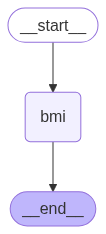

In [34]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())